# 21 - Multiple Testing Problem

**Multiple Testing Problem:** The more tests you run, the more likely you are to find a "winner" by pure luck.

**Key Idea:** If you throw 20 darts blindfolded, one might hit the bullseye by accident. If you test 20 ad headlines, one might look amazing just by random chance.

**The Math:**
- 1 test at 5% error rate (α = 0.05) = Okay
- 20 tests at 5% error rate each = 64% chance of at least one false positive!
- The more you test, the more "false discoveries" you'll make

**Why it matters:** Companies test multiple versions, researchers run many analyses, and algorithms try thousands of patterns. Without correction, most "significant" findings are just luck.

**Solution:** Adjust your threshold (Bonferroni correction) or use other methods to control false discoveries.

## Simple Example: Throwing Darts Blindfolded

Imagine throwing darts at a target while blindfolded. Each throw has a 5% chance of hitting the bullseye by luck.

**Question:** If you throw 20 darts, what's the chance at least one hits the bullseye?

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61702/1575660211.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0, 0), radius, color=color, alpha=0.7, edgecolor='black', linewidth=2)
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61702/1575660211.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right', fontsize=10)


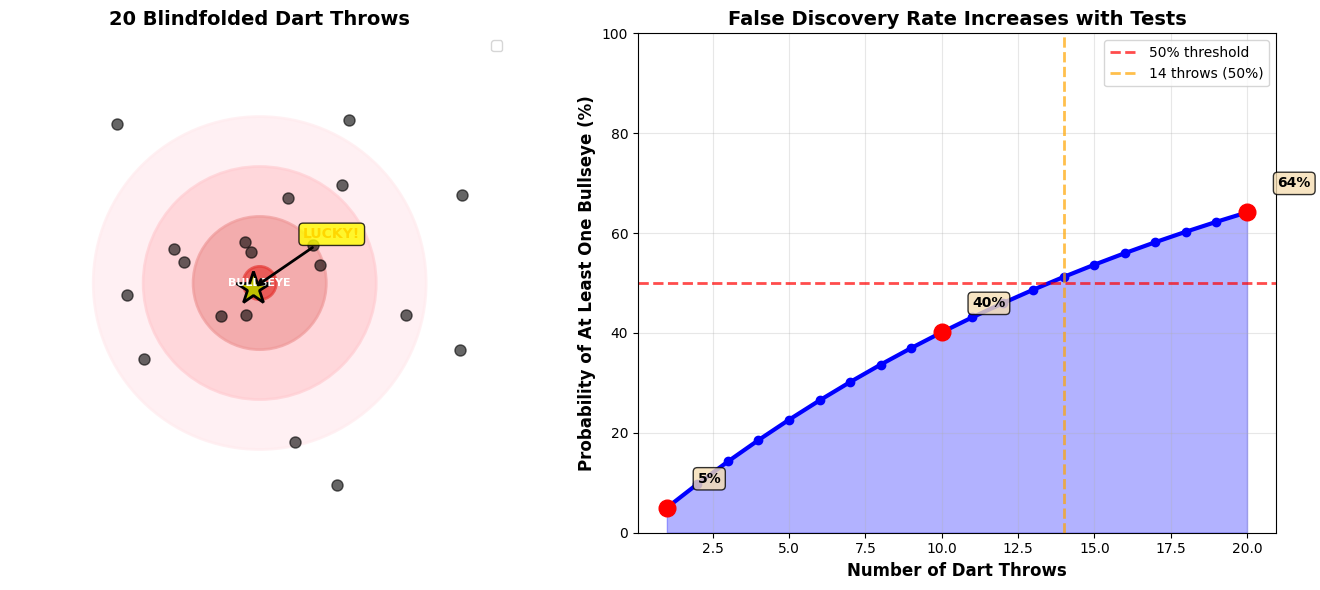


🎯 Multiple Testing: Dart Board Example

Each dart has 5.0% chance of hitting bullseye by luck

With different numbers of throws:
   → 1 throw:  5.0% chance of bullseye
   → 5 throws: 22.6% chance of bullseye
   → 10 throws: 40.1% chance of bullseye
   → 20 throws: 64.2% chance of bullseye

⚠️ THE PROBLEM:
   → With 20 throws, you have a 64% chance of at least one 'lucky' hit
   → You might think you're good at darts, but it's just random chance!
   → This is the SAME problem as running 20 statistical tests


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as patches

# Simulate dart throwing
np.random.seed(42)

# Probability of hitting bullseye by luck on any single throw
p_bullseye = 0.05

# Calculate probability of at least one bullseye in n throws
n_throws = np.arange(1, 21)
prob_at_least_one = 1 - (1 - p_bullseye)**n_throws

# Simulate one actual scenario with 20 throws
throws = np.random.random(20) < p_bullseye

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Dart board with 20 throws
ax1 = axes[0]
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_aspect('equal')

# Draw target rings
circles = [1.0, 0.7, 0.4, 0.1]
colors = ['#FFEBEE', '#FFCDD2', '#EF9A9A', '#E53935']
for radius, color in zip(circles, colors):
    circle = plt.Circle((0, 0), radius, color=color, alpha=0.7, edgecolor='black', linewidth=2)
    ax1.add_patch(circle)

# Add "BULLSEYE" label
ax1.text(0, 0, 'BULLSEYE', ha='center', va='center', fontsize=8, fontweight='bold', color='white')

# Simulate dart positions (random angles and distances)
angles = np.random.uniform(0, 2*np.pi, 20)
distances = np.random.uniform(0.15, 1.4, 20)  # Most darts miss the bullseye

# Place one dart in bullseye if any throws were successful
if throws.any():
    lucky_idx = np.where(throws)[0][0]
    distances[lucky_idx] = 0.05  # In the bullseye

# Plot darts
for i, (angle, dist) in enumerate(zip(angles, distances)):
    x = dist * np.cos(angle)
    y = dist * np.sin(angle)
    
    if dist < 0.1:  # Hit bullseye!
        ax1.plot(x, y, 'y*', markersize=25, markeredgecolor='black', markeredgewidth=2,
                label='Lucky Hit!' if i == 0 else '')
        ax1.annotate('LUCKY!', xy=(x, y), xytext=(x+0.3, y+0.3),
                    fontsize=10, fontweight='bold', color='gold',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', color='black', lw=2))
    else:
        ax1.plot(x, y, 'ko', markersize=8, alpha=0.6)

ax1.set_title('20 Blindfolded Dart Throws', fontsize=14, fontweight='bold')
ax1.axis('off')
if throws.any():
    ax1.legend(loc='upper right', fontsize=10)

# Right: Probability curve
ax2 = axes[1]
ax2.plot(n_throws, prob_at_least_one * 100, 'b-', linewidth=3, marker='o', markersize=6)
ax2.axhline(50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% threshold')
ax2.axvline(14, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='14 throws (50%)')

# Highlight key points
key_points = [1, 10, 20]
for n in key_points:
    prob = (1 - (1 - p_bullseye)**n) * 100
    ax2.plot(n, prob, 'ro', markersize=12)
    ax2.annotate(f'{prob:.0f}%', xy=(n, prob), xytext=(n+1, prob+5),
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax2.fill_between(n_throws, 0, prob_at_least_one * 100, alpha=0.3, color='blue')
ax2.set_xlabel('Number of Dart Throws', fontsize=12, fontweight='bold')
ax2.set_ylabel('Probability of At Least One Bullseye (%)', fontsize=12, fontweight='bold')
ax2.set_title('False Discovery Rate Increases with Tests', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

print("\n🎯 Multiple Testing: Dart Board Example\n")
print(f"Each dart has {p_bullseye*100}% chance of hitting bullseye by luck")
print(f"\nWith different numbers of throws:")
print(f"   → 1 throw:  {(1 - (1 - p_bullseye)**1)*100:.1f}% chance of bullseye")
print(f"   → 5 throws: {(1 - (1 - p_bullseye)**5)*100:.1f}% chance of bullseye")
print(f"   → 10 throws: {(1 - (1 - p_bullseye)**10)*100:.1f}% chance of bullseye")
print(f"   → 20 throws: {(1 - (1 - p_bullseye)**20)*100:.1f}% chance of bullseye")

print(f"\n⚠️ THE PROBLEM:")
print(f"   → With 20 throws, you have a {(1 - (1 - p_bullseye)**20)*100:.0f}% chance of at least one 'lucky' hit")
print(f"   → You might think you're good at darts, but it's just random chance!")
print(f"   → This is the SAME problem as running 20 statistical tests")

## Mathematical Foundation: Family-Wise Error Rate

**The Math Behind Multiple Testing:**

If each test has α = 0.05 (5% false positive rate):
- Probability of NO false positive in one test = 1 - 0.05 = 0.95
- Probability of NO false positives in n tests = (0.95)^n
- Probability of AT LEAST ONE false positive = 1 - (0.95)^n

This grows quickly!

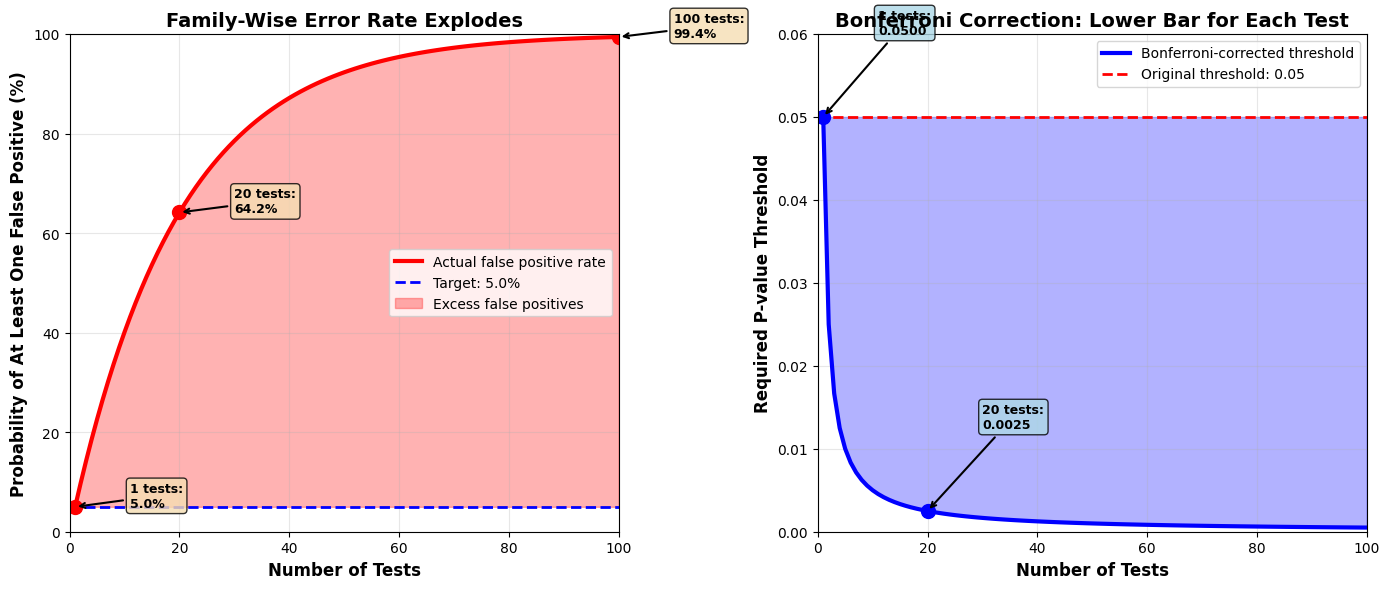


📊 Family-Wise Error Rate (FWER)

With α = 0.05 (5% per test):

Number of Tests | FWER | Bonferroni Threshold
              1 |   5.0% | 0.05000
              5 |  22.6% | 0.01000
             10 |  40.1% | 0.00500
             20 |  64.2% | 0.00250
             50 |  92.3% | 0.00100
            100 |  99.4% | 0.00050

💡 Key Insight:
   → With 20 tests, you have 64.2% chance of false positive (not 5%!)
   → Bonferroni says: Use α = 0.0025 for each test to control overall error
   → This is MUCH stricter: p-value must be < 0.0025 instead of < 0.05


In [2]:
# Calculate family-wise error rate for different numbers of tests
alpha = 0.05  # Individual test significance level
n_tests = np.arange(1, 101)
fwer = 1 - (1 - alpha)**n_tests

# Bonferroni correction
bonferroni_threshold = alpha / n_tests

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Family-wise error rate
ax1 = axes[0]
ax1.plot(n_tests, fwer * 100, 'r-', linewidth=3, label='Actual false positive rate')
ax1.axhline(alpha * 100, color='blue', linestyle='--', linewidth=2, label=f'Target: {alpha*100}%')
ax1.fill_between(n_tests, alpha * 100, fwer * 100, alpha=0.3, color='red', 
                 label='Excess false positives')

# Annotate key points
key_n = [1, 10, 20, 50, 100]
for n in key_n:
    if n <= len(n_tests):
        idx = n - 1
        if n in [1, 20, 100]:
            ax1.plot(n, fwer[idx] * 100, 'ro', markersize=10)
            ax1.annotate(f'{n} tests:\n{fwer[idx]*100:.1f}%', 
                        xy=(n, fwer[idx] * 100), 
                        xytext=(n+10, fwer[idx] * 100),
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

ax1.set_xlabel('Number of Tests', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability of At Least One False Positive (%)', fontsize=12, fontweight='bold')
ax1.set_title('Family-Wise Error Rate Explodes', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)

# Right: Bonferroni correction
ax2 = axes[1]
ax2.plot(n_tests, bonferroni_threshold, 'b-', linewidth=3, label='Bonferroni-corrected threshold')
ax2.axhline(alpha, color='red', linestyle='--', linewidth=2, label=f'Original threshold: {alpha}')
ax2.fill_between(n_tests, bonferroni_threshold, alpha, alpha=0.3, color='blue')

# Annotate key points
for n in [1, 10, 20, 50]:
    if n <= len(n_tests):
        idx = n - 1
        threshold = bonferroni_threshold[idx]
        if n in [1, 20]:
            ax2.plot(n, threshold, 'bo', markersize=10)
            ax2.annotate(f'{n} tests:\n{threshold:.4f}', 
                        xy=(n, threshold), 
                        xytext=(n+10, threshold+0.01),
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

ax2.set_xlabel('Number of Tests', fontsize=12, fontweight='bold')
ax2.set_ylabel('Required P-value Threshold', fontsize=12, fontweight='bold')
ax2.set_title('Bonferroni Correction: Lower Bar for Each Test', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 0.06)

plt.tight_layout()
plt.show()

print("\n📊 Family-Wise Error Rate (FWER)\n")
print(f"With α = {alpha} (5% per test):\n")
print(f"Number of Tests | FWER | Bonferroni Threshold")
print(f"{'='*50}")
for n in [1, 5, 10, 20, 50, 100]:
    idx = n - 1
    if idx < len(fwer):
        print(f"{n:>15} | {fwer[idx]*100:>5.1f}% | {bonferroni_threshold[idx]:.5f}")

print(f"\n💡 Key Insight:")
print(f"   → With 20 tests, you have {fwer[19]*100:.1f}% chance of false positive (not 5%!)")
print(f"   → Bonferroni says: Use α = {alpha/20:.4f} for each test to control overall error")
print(f"   → This is MUCH stricter: p-value must be < {alpha/20:.4f} instead of < {alpha}")

## Real-World Example: Testing 20 Ad Headlines

**Business Context:** Marketing team tests 20 different ad headlines to see which performs best.

**The Trap:** Even if NONE of the headlines are actually better, one might look "significant" by random chance.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61702/1676165728.py:149: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


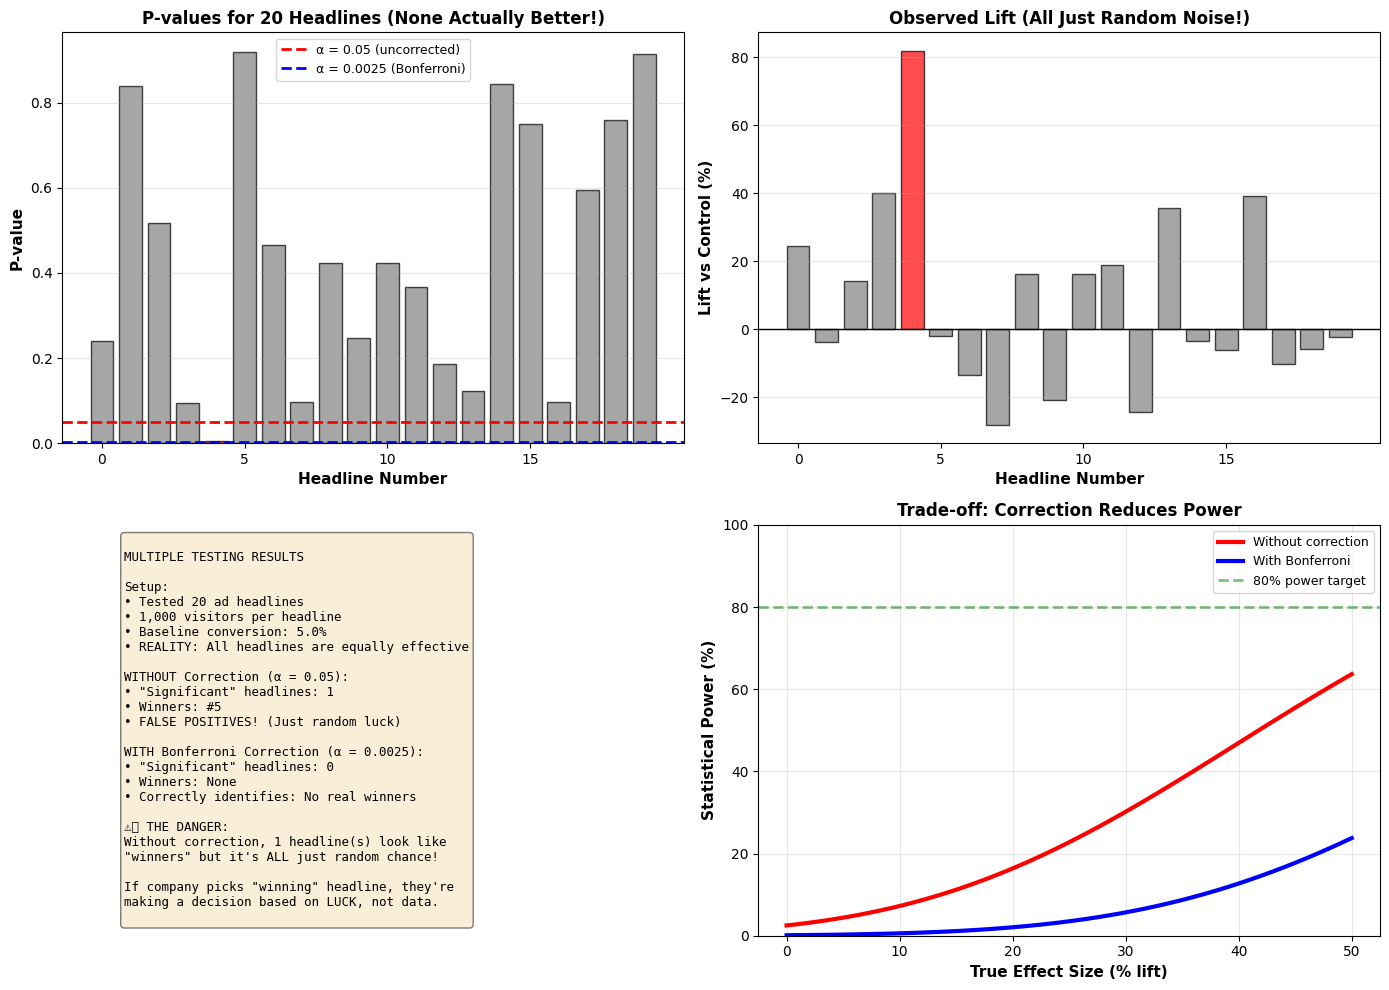


📰 Multiple Testing: Ad Headlines Example

Tested 20 headlines with 1,000 visitors each
TRUTH: All headlines have 5.0% conversion (none better than others)

Results WITHOUT correction (α = 0.05):
   → 1 headline(s) appear 'significant'
   → 'Winners': Headline 5
   → These are FALSE POSITIVES - just luck!

Results WITH Bonferroni correction (α = 0.0025):
   → 0 headline(s) appear 'significant'
   → Correctly identifies: No real winners

⚠️ Business Impact:
   → Without correction: Company picks 'winning' headline based on LUCK
   → Wastes resources on a change that doesn't actually help
   → With correction: Avoids false discovery, makes better decisions

💡 Key Takeaway:
   → Test 20 things, expect ~1 'winner' by pure chance
   → Always correct for multiple testing in business experiments
   → Or use holdout validation to verify 'winners' are real


In [3]:
# Simulate A/B testing 20 ad headlines
np.random.seed(42)

# Control group: baseline conversion rate
baseline_rate = 0.05  # 5% conversion
n_visitors = 1000

# Simulate 20 test headlines - NONE actually better than baseline
n_headlines = 20
headline_names = [f"Headline {i+1}" for i in range(n_headlines)]

# Generate results: all from same distribution (no real effect)
control_conversions = np.random.binomial(n_visitors, baseline_rate, n_headlines)
test_conversions = np.random.binomial(n_visitors, baseline_rate, n_headlines)

# Calculate p-values for each comparison
p_values = []
lift_pct = []
for i in range(n_headlines):
    control_rate = control_conversions[i] / n_visitors
    test_rate = test_conversions[i] / n_visitors
    
    # Two-proportion z-test
    pooled_rate = (control_conversions[i] + test_conversions[i]) / (2 * n_visitors)
    se = np.sqrt(pooled_rate * (1 - pooled_rate) * (2 / n_visitors))
    z = (test_rate - control_rate) / se
    p_val = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed
    
    p_values.append(p_val)
    lift_pct.append((test_rate / control_rate - 1) * 100)

p_values = np.array(p_values)
lift_pct = np.array(lift_pct)

# Bonferroni correction
bonferroni_alpha = 0.05 / n_headlines

# Identify "significant" results
significant_uncorrected = p_values < 0.05
significant_corrected = p_values < bonferroni_alpha

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top-left: P-values for all headlines
ax1 = axes[0, 0]
colors = ['red' if sig else 'gray' for sig in significant_uncorrected]
bars = ax1.bar(range(n_headlines), p_values, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(0.05, color='red', linestyle='--', linewidth=2, label='α = 0.05 (uncorrected)')
ax1.axhline(bonferroni_alpha, color='blue', linestyle='--', linewidth=2, 
           label=f'α = {bonferroni_alpha:.4f} (Bonferroni)')
ax1.set_xlabel('Headline Number', fontsize=11, fontweight='bold')
ax1.set_ylabel('P-value', fontsize=11, fontweight='bold')
ax1.set_title('P-values for 20 Headlines (None Actually Better!)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticks(range(0, n_headlines, 5))

# Top-right: Lift percentages
ax2 = axes[0, 1]
colors2 = ['red' if sig else 'gray' for sig in significant_uncorrected]
bars2 = ax2.bar(range(n_headlines), lift_pct, color=colors2, alpha=0.7, edgecolor='black')
ax2.axhline(0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Headline Number', fontsize=11, fontweight='bold')
ax2.set_ylabel('Lift vs Control (%)', fontsize=11, fontweight='bold')
ax2.set_title('Observed Lift (All Just Random Noise!)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticks(range(0, n_headlines, 5))

# Bottom-left: Comparison table
ax3 = axes[1, 0]
ax3.axis('off')

# Find "winners"
uncorrected_winners = np.where(significant_uncorrected)[0]
corrected_winners = np.where(significant_corrected)[0]

summary_text = f"""
MULTIPLE TESTING RESULTS

Setup:
• Tested {n_headlines} ad headlines
• {n_visitors:,} visitors per headline
• Baseline conversion: {baseline_rate*100}%
• REALITY: All headlines are equally effective

WITHOUT Correction (α = 0.05):
• "Significant" headlines: {len(uncorrected_winners)}
• Winners: {', '.join([f'#{i+1}' for i in uncorrected_winners]) if len(uncorrected_winners) > 0 else 'None'}
• FALSE POSITIVES! (Just random luck)

WITH Bonferroni Correction (α = {bonferroni_alpha:.4f}):
• "Significant" headlines: {len(corrected_winners)}
• Winners: {', '.join([f'#{i+1}' for i in corrected_winners]) if len(corrected_winners) > 0 else 'None'}
• Correctly identifies: No real winners

⚠️ THE DANGER:
Without correction, {len(uncorrected_winners)} headline(s) look like
"winners" but it's ALL just random chance!

If company picks "winning" headline, they're
making a decision based on LUCK, not data.
"""

ax3.text(0.1, 0.5, summary_text, fontsize=9, family='monospace',
        verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Bottom-right: Statistical power comparison
ax4 = axes[1, 1]

# Simulate: What if one headline WAS actually 20% better?
true_effect_size = 0.20  # 20% lift
true_test_rate = baseline_rate * (1 + true_effect_size)

# Power calculation: probability of detecting a real 20% effect
effect_size_range = np.linspace(0, 0.5, 50)
power_uncorrected = []
power_corrected = []

for effect in effect_size_range:
    test_rate = baseline_rate * (1 + effect)
    pooled = (baseline_rate + test_rate) / 2
    se = np.sqrt(pooled * (1 - pooled) * (2 / n_visitors))
    z_alpha = stats.norm.ppf(1 - 0.05/2)  # Uncorrected
    z_bonf = stats.norm.ppf(1 - bonferroni_alpha/2)  # Corrected
    
    effect_difference = test_rate - baseline_rate
    power_unc = 1 - stats.norm.cdf(z_alpha - effect_difference/se)
    power_cor = 1 - stats.norm.cdf(z_bonf - effect_difference/se)
    
    power_uncorrected.append(power_unc)
    power_corrected.append(power_cor)

ax4.plot(effect_size_range * 100, np.array(power_uncorrected) * 100, 
        'r-', linewidth=3, label='Without correction')
ax4.plot(effect_size_range * 100, np.array(power_corrected) * 100,
        'b-', linewidth=3, label='With Bonferroni')
ax4.axhline(80, color='green', linestyle='--', linewidth=2, alpha=0.5, label='80% power target')
ax4.set_xlabel('True Effect Size (% lift)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Statistical Power (%)', fontsize=11, fontweight='bold')
ax4.set_title('Trade-off: Correction Reduces Power', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(alpha=0.3)
ax4.set_ylim(0, 100)

plt.tight_layout()
plt.show()

print("\n📰 Multiple Testing: Ad Headlines Example\n")
print(f"Tested {n_headlines} headlines with {n_visitors:,} visitors each")
print(f"TRUTH: All headlines have {baseline_rate*100}% conversion (none better than others)\n")

print(f"Results WITHOUT correction (α = 0.05):")
print(f"   → {len(uncorrected_winners)} headline(s) appear 'significant'")
if len(uncorrected_winners) > 0:
    print(f"   → 'Winners': {', '.join([f'Headline {i+1}' for i in uncorrected_winners])}")
    print(f"   → These are FALSE POSITIVES - just luck!")
else:
    print(f"   → No false positives this time (got lucky)")

print(f"\nResults WITH Bonferroni correction (α = {bonferroni_alpha:.4f}):")
print(f"   → {len(corrected_winners)} headline(s) appear 'significant'")
if len(corrected_winners) > 0:
    print(f"   → Still some false positives (Bonferroni not perfect)")
else:
    print(f"   → Correctly identifies: No real winners")

print(f"\n⚠️ Business Impact:")
if len(uncorrected_winners) > 0:
    print(f"   → Without correction: Company picks 'winning' headline based on LUCK")
    print(f"   → Wastes resources on a change that doesn't actually help")
    print(f"   → With correction: Avoids false discovery, makes better decisions")
else:
    print(f"   → Even with no false positives here, risk is {fwer[19]*100:.1f}% across tests")

print(f"\n💡 Key Takeaway:")
print(f"   → Test 20 things, expect ~1 'winner' by pure chance")
print(f"   → Always correct for multiple testing in business experiments")
print(f"   → Or use holdout validation to verify 'winners' are real")

## Summary: Multiple Testing Problem

### The Core Problem
**More tests = More chances for false positives**

| Number of Tests | Probability of ≥1 False Positive (α=0.05) |
|-----------------|-------------------------------------------|
| 1 | 5% |
| 5 | 23% |
| 10 | 40% |
| 20 | 64% |
| 50 | 92% |
| 100 | 99.4% |

### Real-World Examples
- **Marketing:** Testing 20 ad headlines → 1+ will look "amazing" by luck
- **Medical Research:** Testing 50 genes → expect ~2-3 false discoveries
- **A/B Testing:** Testing 10 features → 1+ will show "significant" lift by chance
- **Data Mining:** Algorithm tests thousands of patterns → most "signals" are noise

### Why It Happens
```
P(no false positives in one test) = 0.95
P(no false positives in n tests) = 0.95^n
P(at least one false positive) = 1 - 0.95^n

This grows FAST!
```

### Solutions

**1. Bonferroni Correction (Conservative)**
- New threshold: α_new = α / n
- Example: 20 tests → use α = 0.05/20 = 0.0025
- **Pro:** Simple, controls false positives
- **Con:** Reduces statistical power (harder to detect real effects)

**2. False Discovery Rate (FDR) - Benjamini-Hochberg (Less Conservative)**
- Controls proportion of false discoveries among all discoveries
- More powerful than Bonferroni
- Better for exploratory research

**3. Pre-specification**
- Decide BEFORE testing which comparisons to make
- Don't "fish" for significant results

**4. Holdout Validation**
- Find "winners" in one dataset
- Validate on separate holdout data
- Real effects replicate, false positives don't

**5. Bayesian Approaches**
- Use prior information to calibrate evidence
- Naturally accounts for multiple comparisons

### The Trade-off
```
No correction → Many false positives (Type I errors)
Strict correction → Miss real effects (Type II errors)

Choose based on context:
• Medical treatment: Strict (avoid false positives)
• Early research: Moderate (balance discovery vs false positives)
• Business testing: Validate winners before rollout
```

### Practical Advice
1. **Always correct** when running multiple tests
2. **Pre-specify** your hypotheses when possible
3. **Use holdout data** to validate discoveries
4. **Report all tests run**, not just significant ones
5. **Be suspicious** of researchers who find exactly what they were looking for

### Remember
**The dart board analogy:** Throw 20 darts blindfolded, one might hit the bullseye by accident. That doesn't mean you're good at darts. Testing 20 things means one might look "significant" just by luck. That doesn't mean it's real.

**Bottom line:** More testing = more false alarms. Correct for it, or you'll make decisions based on luck!